# Proyecto: Clasificación de Actividades

## Importación de Datos

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import scipy as sci
from scipy.stats import mode

raw=pd.read_csv('CREDITRISK_RAW.csv',delimiter=';',header=None)

#print(raw)

DIR='C:\Projects\Physical_activity_classifier/Smartphone_Dataset'

def get_stats(raw):
    data=raw.as_matrix()
    #print(data)
    PAGA_count=0
    x,y=[],[]
    for i in range(1,len(data)):
        xi,yi=[],[]
        for j in range(0,len(data[0])-1):
            xi.append(data[i][j])
        yi.append(data[i][len(data[0])-1])
        x.append(xi)
        y.append(yi)
     
    print("Cantidad de datos: {}".format(len(x)))
    print("Cantidad de características: {}".format(len(x[0])))
    #print(y[0])
    for i in range(0,len(y)):
        if y[i][0]=='PAGA':
            PAGA_count+=1
    print("Cuantos clientes pagan: {}/{}:".format(PAGA_count,len(data)))
    return



In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

dataset = pd.read_csv('CREDITRISK_RAW.csv',delimiter=';',header=None)
dataset=dataset.dropna()
features = dataset.iloc[:, [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
y_data = dataset.iloc[:, [19]]
#data=dataset.as_matrix()

get_stats(dataset)



Cantidad de datos: 2240
Cantidad de características: 19
Cuantos clientes pagan: 1099/2241:


In [4]:
#target
#print(y_data)
print(len(y_data))
y_data=y_data[1:len(y_data)]
labelencoder_y = LabelEncoder()
y_data = labelencoder_y.fit_transform(y_data)

print(len(y_data))
#-----------------------------------------------------------------------------
#Genero
gen = dataset.iloc[:, [1]]

gen = gen[1:len(gen)]

labelencoder_edad = LabelEncoder()
gen = labelencoder_edad.fit_transform(gen)
#------------------------------------------------------------------------------
#Edad
edad = dataset.iloc[:, [3]]

edad = edad[1:len(edad)]

#------------------------------------------------------------------------------
#Nivel Educacional
niv_ed = dataset.iloc[:, [4]]

niv_ed = niv_ed[1:len(niv_ed)]

#labelencoder_gen = LabelEncoder()
#gen = labelencoder_edad.fit_transform(gen)



2241
2240


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


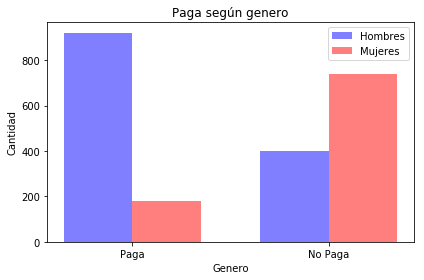

In [5]:
#grafico Genero
M_P,F_P,M_NP,F_NP=0,0,0,0

for i in range(0,len(y_data)):
    #mujer
    if gen[i]==0:
        if y_data[i]==1:
            F_P+=1
        else:
            F_NP+=1
    #hombre
    if gen[i]==1:
        if y_data[i]==1:
            M_P+=1
        else:
            M_NP+=1
            
            
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

n_groups = 2

men = (M_P, M_NP)
women = (F_P, F_NP)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.5
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, men, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Hombres')

rects2 = ax.bar(index + bar_width, women, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='Mujeres')

ax.set_xlabel('Genero')
ax.set_ylabel('Cantidad')
ax.set_title('Paga según genero')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Paga', 'No Paga'))
ax.legend()

fig.tight_layout()
plt.show()

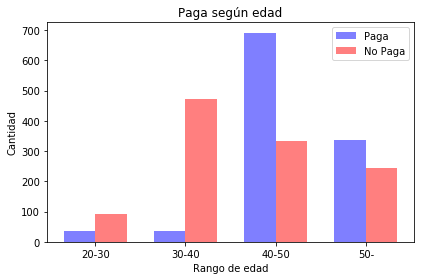

In [6]:
#grafico Genero

edad_arr=edad.as_matrix()
edad_arr=np.reshape(edad_arr,-1)

P_20,NP_20,P_30,NP_30,P_40,NP_40,P_50,NP_50=0,0,0,0,0,0,0,0

for i in range(0,len(y_data)):
    #mujer
    if int(edad_arr[i])>=20 and int(edad_arr[i])<30:
        if y_data[i]==1:
            P_20+=1
        else:
            NP_20+=1
    if int(edad_arr[i])>=30 and int(edad_arr[i])<40:
        if y_data[i]==1:
            P_30+=1
        else:
            NP_30+=1
    if int(edad_arr[i])>=40 and int(edad_arr[i])<50:
        if y_data[i]==1:
            P_40+=1
        else:
            NP_40+=1
    if int(edad_arr[i])>=50 :
        if y_data[i]==1:
            P_50+=1
        else:
            NP_50+=1
    

n_groups = 4

P_edad = (P_20, P_30,P_40, P_50)
NP_edad = (NP_20, NP_30,NP_40, NP_50)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.5
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, P_edad, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Paga')

rects2 = ax.bar(index + bar_width, NP_edad, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='No Paga')

ax.set_xlabel('Rango de edad')
ax.set_ylabel('Cantidad')
ax.set_title('Paga según edad')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('20-30', '30-40','40-50', '50-'))
ax.legend()

fig.tight_layout()
plt.show()

MED     asdas
MED     asdas
TEC     asdas
UNV     asdas
UNV     asdas
MED     asdas
UNV     asdas
UNV     asdas
MED     asdas
UNV     asdas
UNV     asdas
UNV     asdas
UNV     asdas
TEC     asdas
UNV     asdas
UNV     asdas
UNV     asdas
TEC     asdas
UNV     asdas
TEC     asdas
UNV     asdas
MED     asdas
TEC     asdas
UNV     asdas
TEC     asdas
UNV     asdas
UNV     asdas
TEC     asdas
MED     asdas
TEC     asdas
MED     asdas
TEC     asdas
MED     asdas
MED     asdas
MED     asdas
MED     asdas
UNV     asdas
UNV     asdas
MED     asdas
MED     asdas
UNV     asdas
MED     asdas
MED     asdas
TEC     asdas
TEC     asdas
TEC     asdas
MED     asdas
MED     asdas
TEC     asdas
TEC     asdas
TEC     asdas
MED     asdas
UNV     asdas
TEC     asdas
MED     asdas
MED     asdas
MED     asdas
TEC     asdas
TEC     asdas
UNV     asdas
UNV     asdas
MED     asdas
UNV     asdas
UNV     asdas
UNV     asdas
UNV     asdas
MED     asdas
MED     asdas
UNV     asdas
MED     asdas
TEC     asdas
MED   

UNV     asdas
UNV     asdas
UNV     asdas
TEC     asdas
MED     asdas
TEC     asdas
MED     asdas
MED     asdas
BAS     asdas
TEC     asdas
UNV     asdas
UNV     asdas
MED     asdas
TEC     asdas
UNV     asdas
TEC     asdas
MED     asdas
UNV     asdas
UNV     asdas
MED     asdas
UNV     asdas
UNV     asdas
MED     asdas
UNV     asdas
MED     asdas
MED     asdas
TEC     asdas
MED     asdas
UNV     asdas
TEC     asdas
MED     asdas
UNV     asdas
TEC     asdas
TEC     asdas
TEC     asdas
TEC     asdas
TEC     asdas
UNV     asdas
TEC     asdas
UNV     asdas
TEC     asdas
UNV     asdas
TEC     asdas
MED     asdas
UNV     asdas
MED     asdas
UNV     asdas
UNV     asdas
UNV     asdas
MED     asdas
UNV     asdas
TEC     asdas
TEC     asdas
MED     asdas
UNV     asdas
MED     asdas
MED     asdas
TEC     asdas
MED     asdas
UNV     asdas
MED     asdas
UNV     asdas
UNV     asdas
UNV     asdas
MED     asdas
UNV     asdas
MED     asdas
UNV     asdas
TEC     asdas
UNV     asdas
UNV     asdas
UNV   

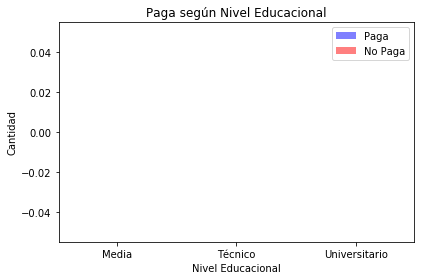

In [8]:
#grafico Nivel Educacional

niv_ed_arr=niv_ed.as_matrix()
niv_ed_arr=np.reshape(niv_ed_arr,-1)

P_Med, NP_Med, P_Tec, NP_Tec, P_Uni, NP_Uni = 0, 0, 0, 0, 0, 0 

for i in range(0,len(y_data)):
    #Med
    nivel = str(niv_ed_arr[i])
    print(niv_ed_arr[i])
    if nivel.upper() == 'MED':        
        if y_data[i]==1:
            P_Med+=1
        else:
            NP_Med+=1
    #Tec
    if nivel.upper() == 'TEC':
        if y_data[i]==1:
            P_Tec+=1
        else:
            NP_Tec+=1
    #Uni
    if nivel.upper() == 'UNV':
        if y_data[i]==1:
            P_Uni+=1
        else:
            NP_Uni+=1

    

n_groups = 3

P_niv_ed = (P_Med, P_Tec, P_Uni)
NP_niv_ed = (NP_Med, NP_Tec, NP_Uni)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.5
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, P_niv_ed, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Paga')

rects2 = ax.bar(index + bar_width, NP_niv_ed, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='No Paga')

ax.set_xlabel('Nivel Educacional')
ax.set_ylabel('Cantidad')
ax.set_title('Paga según Nivel Educacional')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Media', 'Técnico','Universitario'))
ax.legend()

fig.tight_layout()
plt.show()